# Front-end frameworks comparison

In this analysis we will analyze usage of Angular, React and Vue.

First, let's see in how many questions those tags apppear.

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

colormap = ['#b42e35', '#61dafb', '#4fc08d']
fe_tags = ['angular', 'reactjs', 'vue.js']

In [9]:
tags = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1198482')
fe_data = tags[tags.TagName.isin(fe_tags)]
fe_data.head()

,tag_count,TagName,Id
7,63699,angular,125866
15,53355,reactjs,92497
47,15903,vue.js,104257


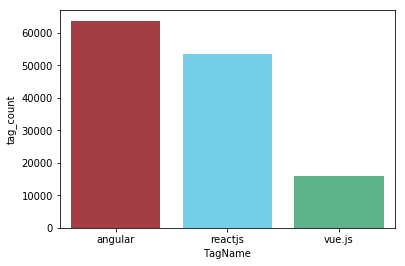

In [10]:
sns.barplot(data=fe_data, x='TagName', y='tag_count', palette=colormap)

As we can see, `angular` and `react` are leading in number of quesions, while `vue.js` has approximately 3 times less questions then `react` in 2018.

## Number of questions per week

Query: https://data.stackexchange.com/stackoverflow/query/967346/frontend-frameworks-questions-per-week

In [11]:
fe_per_week = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1199117')
fe_per_week['start'] = fe_per_week.apply(lambda r: r.start.split(' ')[0], axis=1)
fe_per_week.head()

,TagName,start,weeklyDayAverage
0,angular,2018-01-01,115.142857
1,reactjs,2018-01-01,85.000000
2,vue.js,2018-01-01,20.714285
3,reactjs,2018-01-07,111.857142
4,angular,2018-01-07,182.000000


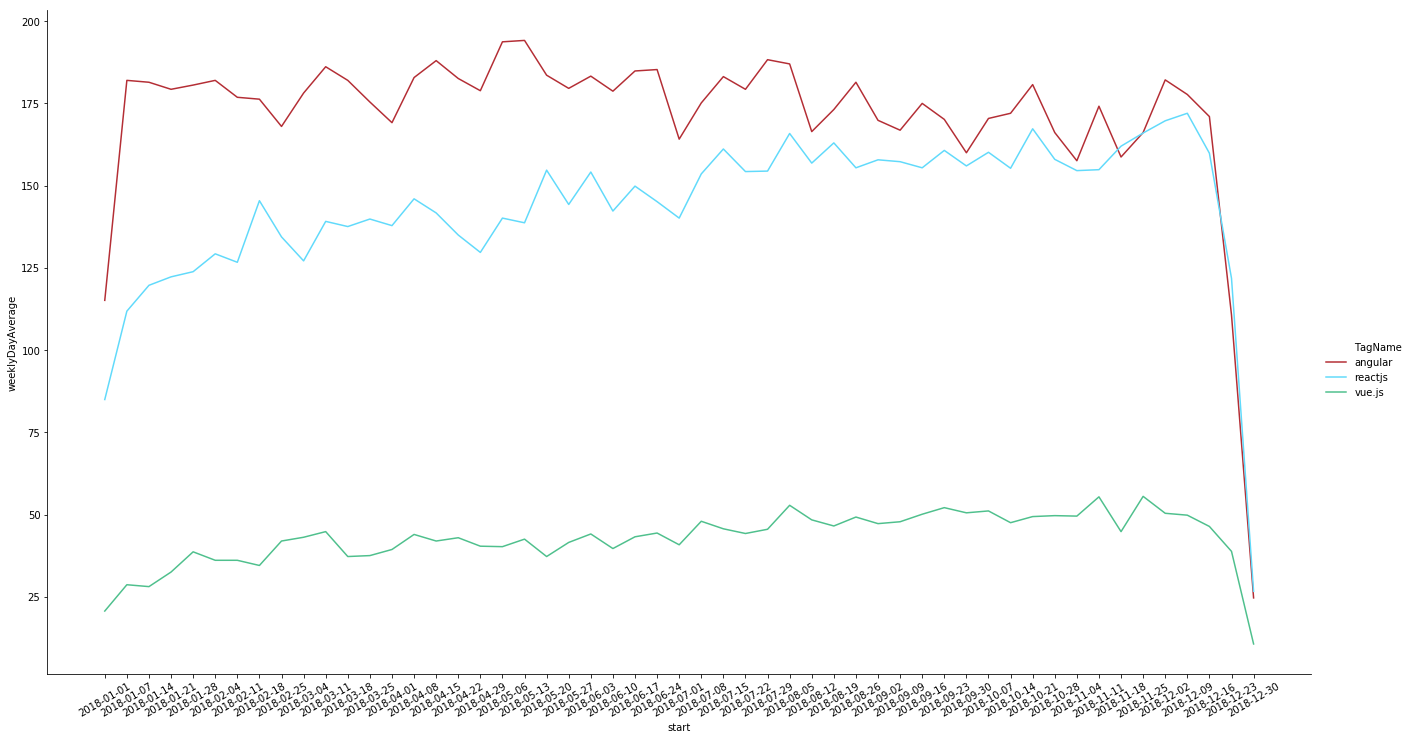

In [12]:
trend_plot = sns.relplot(data=fe_per_week, x='start', y='weeklyDayAverage', hue='TagName', palette=colormap, kind='line', height=10, aspect=1.85)
trend_plot.set_xticklabels(rotation=30)

## Geographic locations of question creators for each frontend frameworks

In this section we want to see in which part of the globe each frontend framework is popular.
__Query__: https://data.stackexchange.com/stackoverflow/query/967358/frontend-frameworks-by-geolocation

In [13]:
geo_fe_data = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1199123')
geo_fe_data = geo_fe_data.fillna('N/A')
geo_fe_data.head()

,count,Location,TagName
0,30215,N/A,angular
1,24843,N/A,reactjs
2,7604,N/A,vue.js
3,1183,"Bangalore, Karnataka, India",angular
4,1154,India,angular


- Angular

In [14]:
geo_fe_data[geo_fe_data.TagName == 'angular'].groupby('Location').sum().sort_values('count', ascending=False).head(15)

,count
Location,
N/A,30798
"Bangalore, Karnataka, India",1183
India,1154
"Chennai, Tamil Nadu, India",633
"Pune, Maharashtra, India",531
"Hyderabad, Telangana, India",518
Germany,420
"Bengaluru, Karnataka, India",394
France,356


Summary: Angular is quite popular in India (top 5 known locations where Angular is used are from India). Besides India, Angular is also popular in Europe.

- React

In [15]:
geo_fe_data[geo_fe_data.TagName == 'reactjs'].groupby('Location').sum().sort_values('count', ascending=False).head(15)

,count
Location,
N/A,25306
India,815
"Bangalore, Karnataka, India",582
"Paris, France",313
United States,294
"London, United Kingdom",282
"Toronto, ON, Canada",264
"Pune, Maharashtra, India",251
"Bengaluru, Karnataka, India",242


Summary: React is not as popular as Angular in India, but majority of react questions come from Indian users of stackoverflow(first 2 places for known locations are in India). Third and fourth place belongs to France and United States.

- Vue.js

In [16]:
geo_fe_data[geo_fe_data.TagName == 'vue.js'].groupby('Location').sum().sort_values('count', ascending=False).head(15)

,count
Location,
N/A,7739
Germany,143
India,142
"Paris, France",131
France,116
"London, United Kingdom",89
"Moscow, Russia",83
Philippines,72
Israel,71


Summary: Vue.js is popular in Europe, especially Germany and France, which hold 1st, 3rd and 4th place among known locations. Second place belongs to India

## Usage with other tags/libraries

In this section we will try to see what other libraries are used with these frontend frameworks

__Query__: https://data.stackexchange.com/stackoverflow/query/967370/combination-of-other-tags-with-frontend-tags

In [17]:
tag_combination_data = pd.read_csv('https://data.stackexchange.com/stackoverflow/csv/1199135')

In [18]:
tag_combination_data.head()

,TagName,TagName.1,cnt
0,angular,typescript,13615
1,reactjs,react-native,5990
2,reactjs,redux,5057
3,vue.js,vuejs2,4108
4,angular,angular5,3686


#### Angular and other libraries/tags

In [19]:
angular_tag_data = tag_combination_data[tag_combination_data.TagName == 'angular']
angular_tag_data.head(10)

,TagName,TagName.1,cnt
0,angular,typescript,13615
4,angular,angular5,3686
5,angular,html,3615
6,angular,angular6,3533
8,angular,ionic-framework,2823
11,angular,angular-material,2655
12,angular,rxjs,2531
13,angular,css,2212
16,angular,node.js,2087
17,angular,ionic3,2023


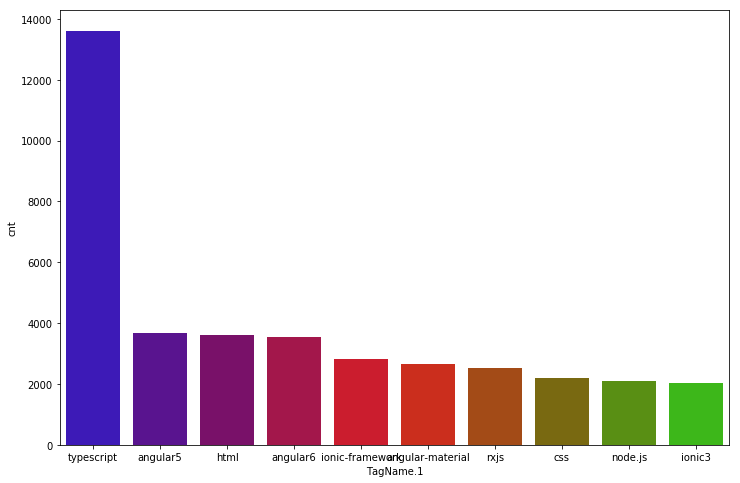

In [31]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
sns.barplot(data = angular_tag_data.head(10), x='TagName.1', y='cnt', ax=ax, palette='brg')

#### React and other libraries/tags

In [32]:
react_tag_data = tag_combination_data[tag_combination_data.TagName == 'reactjs']
react_tag_data.head(10)

,TagName,TagName.1,cnt
1,reactjs,react-native,5990
2,reactjs,redux,5057
7,reactjs,react-redux,3314
9,reactjs,react-router,2713
10,reactjs,node.js,2680
14,reactjs,css,2159
15,reactjs,webpack,2158
18,reactjs,typescript,1783
22,reactjs,material-ui,1461
23,reactjs,html,1454


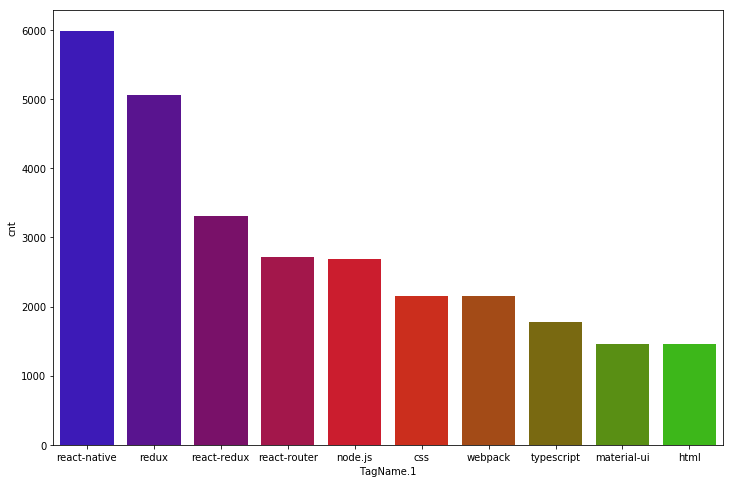

In [33]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
sns.barplot(data = react_tag_data.head(10), x='TagName.1', y='cnt', ax=ax, palette='brg')

#### Vue.js and other tags

In [37]:
vue_tag_data = tag_combination_data[tag_combination_data.TagName == 'vue.js']
vue_tag_data.head(10)

,TagName,TagName.1,cnt
3,vue.js,vuejs2,4108
19,vue.js,vue-component,1666
27,vue.js,vuex,1175
28,vue.js,laravel,1154
32,vue.js,vue-router,965
34,vue.js,webpack,920
52,vue.js,axios,736
54,vue.js,vuetify.js,732
55,vue.js,html,699
63,vue.js,nuxt.js,590


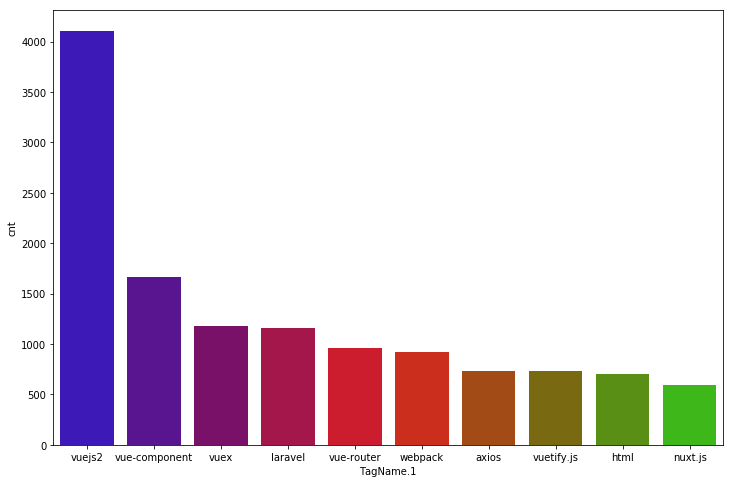

In [35]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
sns.barplot(data = vue_tag_data.head(10), x='TagName.1', y='cnt', ax=ax, palette='brg')